### DESAFIO 1 - Graficos
#### MATÍAS ROJAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fname = "qog_std_cs_jan18.csv"
df = pd.read_csv(fname)
df.head()

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.710616,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1. Genere una submuestra de casos

In [3]:
# Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria
random_seed = 9605 

In [4]:
# Seleccione el 50% de los casos
#Cada base generada debe contener los siguientes elementos:
#(undp_hdi),(ccodealp),(ht_region),(gle_cgdpc),(imf_pop)
# variables adicionales según apellido wef_imort, who_alc2000, who_tobt, wdi_exph
df_sample = df[['cname',
                'undp_hdi',
                'ccodealp',
                'ht_region',
                'gle_cgdpc',
                'imf_pop',
                'wef_imort',
                'who_alc2000',
                'who_tobt',
                'wdi_exph']].sample(frac=0.5, random_state=random_seed)

In [5]:
df_sample.head()

,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
34,Chad,0.394,TCD,4,1651.0500,NaN,89.400002,0.64,NaN,3.621164
49,Dominica,0.724,DMA,10,12613.7200,NaN,NaN,5.46,NaN,5.485833
147,St Vincent and the Grenadines,0.720,VCT,10,7454.8799,0.110,NaN,7.01,NaN,8.630239
84,Jamaica,0.729,JAM,10,4668.7700,2.799,14.400000,3.83,17.6,5.361525
117,Oman,0.795,OMN,3,26158.7300,3.717,10.000000,0.40,13.5,3.553940


In [6]:
#Renombre las categorías de la variable ht_region de números a regiones
df_sample['region'] = df_sample['ht_region'].replace(
            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            ['EastEurope', 'LatAm', 'NorthAfrica', 'SubSaharian', 'WesternDem',
             'EastAsia', 'SouthEastAsia', 'SouthAsia', 'Pacific', 'Caribbean'])


#la agregue a df para mayor comodidad
df['region'] = df_sample['ht_region'].replace(
            [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
            ['EastEurope', 'LatAm', 'NorthAfrica', 'SubSaharian', 'WesternDem',
             'EastAsia', 'SouthEastAsia', 'SouthAsia', 'Pacific', 'Caribbean'])

In [7]:
df_sample.head()

,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,region
34,Chad,0.394,TCD,4,1651.0500,NaN,89.400002,0.64,NaN,3.621164,SubSaharian
49,Dominica,0.724,DMA,10,12613.7200,NaN,NaN,5.46,NaN,5.485833,Caribbean
147,St Vincent and the Grenadines,0.720,VCT,10,7454.8799,0.110,NaN,7.01,NaN,8.630239,Caribbean
84,Jamaica,0.729,JAM,10,4668.7700,2.799,14.400000,3.83,17.6,5.361525,Caribbean
117,Oman,0.795,OMN,3,26158.7300,3.717,10.000000,0.40,13.5,3.553940,NorthAfrica


### 2. Genere una función que ingrese su objeto y devuelva:
Compare las estadísticas con algún compañero:<br>
R: En la primera comparación con mi compañero el resultado era completamente diferente, para la mayoría de las medidas descriptivas en todas las columnas, al modificar la semilla (random_seed) Logramos obtener los mismos resultados en las medidas, esto debido a la incidencia de la semilla en la selección de la muestra.

¿Ve alguna diferencia substancial en algunade ellas?

In [8]:
def funcion_medidas_descriptivas(df):
    continuos = df.select_dtypes(include=['float64'])
    discretos = df.select_dtypes(exclude=['float64'])
    print("CONTINUOS\n")
    print(continuos.describe())
    
    columnas = discretos.columns.tolist()
    
    for i in columnas:
        print("\nDISCRETOS\n",)
        print("variable: [",i,"]")
        print(df[i].value_counts())

In [9]:
funcion_medidas_descriptivas(df_sample)

CONTINUOS

        undp_hdi      gle_cgdpc     imf_pop  wef_imort  who_alc2000  \
count  92.000000      96.000000   69.000000  78.000000    92.000000   
mean    0.693533   12396.815036   27.658449  23.739743     4.874022   
std     0.150359   15428.124243   47.789441  22.229198     3.926824   
min     0.394000     488.269990    0.012000   1.800000     0.000000   
25%     0.572500    2640.032525    0.858000   6.275000     1.095000   
50%     0.724000    7183.579850    8.140000  14.300000     4.445000   
75%     0.795750   15180.065000   30.809000  40.450000     8.160000   
max     0.938000  108481.130000  252.164993  89.400002    15.190000   

        who_tobt   wdi_exph  
count  58.000000  95.000000  
mean   22.850000   6.531882  
std     9.795618   2.543362  
min     4.700000   2.613916  
25%    14.850000   4.797730  
50%    22.450000   5.788950  
75%    29.675001   7.784527  
max    48.900002  17.135723  

DISCRETOS

variable: [ cname ]
Somalia                          1
St Kitts and

### 3. Genere una función que liste las observaciones perdidas de una variable

In [10]:
def funcion_perdidas(dataframe, var, print_list=False):
    if print_list==True:
        na_df = dataframe[var].isna()
        return var, na_df
    else:
        na_df = dataframe[var].isna()
        dframe=''
        ar_var = []
        ar_cantidad = []
        ar_cantidad_true = []
        ar_porcentaje_notna = []
        ar_porcentaje_na = []
        lista_variables = dataframe.columns.tolist()
        for i in lista_variables:
            var, na_df = funcion_perdidas(dataframe,i , print_list=True)
            ar_var.append(var)
            falses = na_df.value_counts()[0]
            trues = len(na_df)-falses
            nopor = (1-na_df.value_counts('%')[0])
            ar_cantidad.append(na_df.value_counts()[0])
            ar_cantidad_true.append(trues)
            ar_porcentaje_notna.append(na_df.value_counts('%')[0])
            ar_porcentaje_na.append(nopor)
        dframe = pd.DataFrame({'var':ar_var, 
                              'isnotna':ar_cantidad,
                              'isna':ar_cantidad_true,
                              'porcentajenotna':ar_porcentaje_notna,
                              'porcentajena':ar_porcentaje_na})
        return dframe

In [11]:
funcion_perdidas(df_sample, 'undp_hdi', False)

,var,isnotna,isna,porcentajenotna,porcentajena
0,cname,97,0,1.000000,0.000000
1,undp_hdi,92,5,0.948454,0.051546
2,ccodealp,97,0,1.000000,0.000000
3,ht_region,97,0,1.000000,0.000000
4,gle_cgdpc,96,1,0.989691,0.010309
5,imf_pop,69,28,0.711340,0.288660
6,wef_imort,78,19,0.804124,0.195876
7,who_alc2000,92,5,0.948454,0.051546
8,who_tobt,58,39,0.597938,0.402062
9,wdi_exph,95,2,0.979381,0.020619


In [12]:
valoresna = funcion_perdidas(df_sample, 'undp_hdi')

In [13]:
valoresna[['var','porcentajena']].sort_values(by=['porcentajena'],ascending=False)[:3]

,var,porcentajena
8,who_tobt,0.402062
5,imf_pop,0.288660
6,wef_imort,0.195876


In [14]:
lista_paises1 = df_sample[df_sample['who_tobt'].isna()]['cname']
lista_paises2 = df_sample[df_sample['imf_pop'].isna()]['cname']
lista_paises3 = df_sample[df_sample['wef_imort'].isna()]['cname']

### 4. Grafique los histogramas

In [15]:
def graficos(dataframe, var, true_man, sample_mean=False):
    mean_total = df[var].dropna().mean()
    stdd_total = df[var].dropna().std()
    mean_sample = df_sample[var].dropna().mean()
    plt.hist(df[var].dropna(), color='blue', alpha=.4)
    if true_man == True:
        plt.axvline(mean_total, lw=3, color='green', ls='-', label='media en Base')
    if sample_mean == True:
        plt.axvline(mean_sample, lw=3, color='red', ls='--', label='Media  en seleccion muestral')
        plt.xlabel(var)
    plt.legend()


In [16]:
df.head()

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust,region
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SouthAsia
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EastEurope
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286,NorthAfrica
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df_sample.head()

,cname,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph,region
34,Chad,0.394,TCD,4,1651.0500,NaN,89.400002,0.64,NaN,3.621164,SubSaharian
49,Dominica,0.724,DMA,10,12613.7200,NaN,NaN,5.46,NaN,5.485833,Caribbean
147,St Vincent and the Grenadines,0.720,VCT,10,7454.8799,0.110,NaN,7.01,NaN,8.630239,Caribbean
84,Jamaica,0.729,JAM,10,4668.7700,2.799,14.400000,3.83,17.6,5.361525,Caribbean
117,Oman,0.795,OMN,3,26158.7300,3.717,10.000000,0.40,13.5,3.553940,NorthAfrica


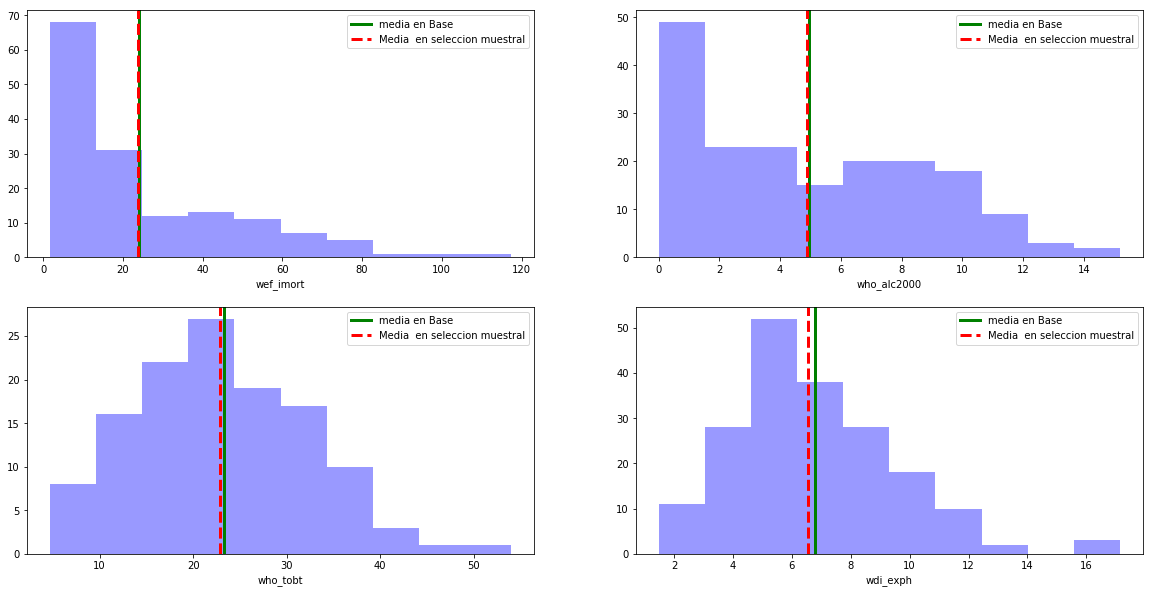

In [18]:
# Graficos según apellido wef_imort, who_alc2000, who_tobt, wdi_exph
plt.figure(figsize=(20,10))
plt.subplot(221)
graficos(df, 'wef_imort', True, sample_mean=True)
plt.subplot(222)
graficos(df, 'who_alc2000', True, sample_mean=True)
plt.subplot(223)
graficos(df, 'who_tobt', True, sample_mean=True)
plt.subplot(224)
graficos(df, 'wdi_exph', True, sample_mean=True)

## ¿En qué variables la media de la submuestra es mayor a la de la muestra completa?
 R. En ninguno de los casos la variable logró superar la media de la muestra completa, sin embargo el caso de la variable WEF_IMORT fue donde estuvo más cerca de la media muestral

### 5. Genere una función que devuelva un dotplot

In [19]:
def plot_dotplot(dataframe, plot_var, plot_by, global_stat=False, statistic='mean'):
    if statistic=='mean':
        stat = dataframe.groupby(plot_by)[plot_var].mean()
    if statistic=='median':
        stat = dataframe.groupby(plot_by)[plot_var].median()
    plt.plot(stat.values, stat.index.tolist(), 'o', label=plot_by)
    if global_stat:
        mean_tot = dataframe[plot_var].dropna().mean()
        plt.axvline(mean_tot, lw=2, color='tomato', ls='--', label='true_mean')
    plt.legend()
    plt.xlabel(plot_var)

In [20]:
valoresna[['var','porcentajenotna']].sort_values(by=['porcentajenotna'],ascending=False)[:7]

,var,porcentajenotna
0,cname,1.000000
2,ccodealp,1.000000
3,ht_region,1.000000
10,region,1.000000
4,gle_cgdpc,0.989691
9,wdi_exph,0.979381
1,undp_hdi,0.948454


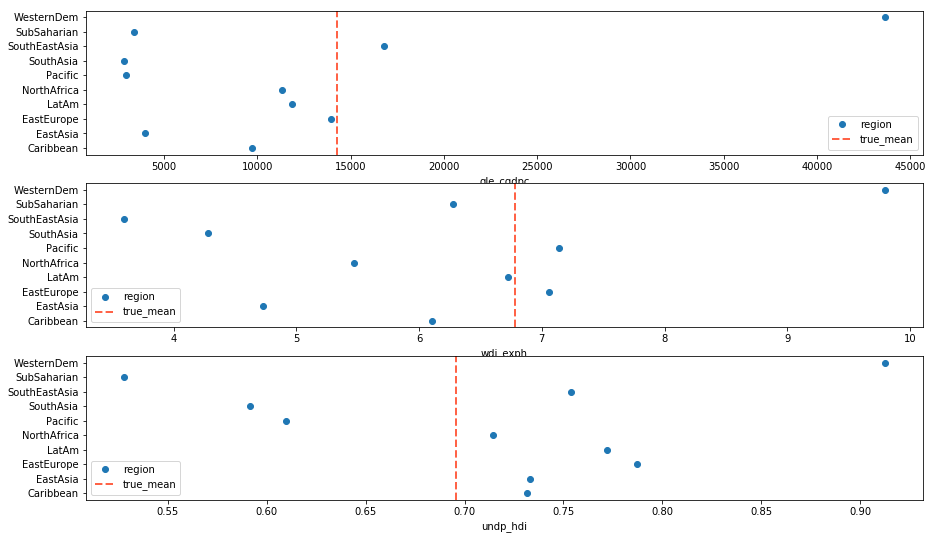

In [21]:
plt.figure(figsize=(15,9))
plt.subplot(311)
plot_dotplot(df, 'gle_cgdpc', 'region', global_stat=True)
plt.subplot(312)
plot_dotplot(df, 'wdi_exph', 'region', global_stat=True)
plt.subplot(313)
plot_dotplot(df, 'undp_hdi', 'region', global_stat=True)

### DESAFIO 6

In [22]:
df_sample.to_csv('subsample_mrc_demo.csv')